# Deep Learning

## HW2- Problem 3 - lating alphabet

Full Name: Mohammad Kalbasi

Student Number: 401211028

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib
import seaborn as sns
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/deep_learning/HW02/Q3/Q3_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/deep_learning/HW02/Q3/Q3_test.csv')
train_df.tail(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27445,14,167,169,170,171,171,172,172,172,171,...,215,215,211,208,211,201,167,119,75,48
27446,19,133,135,138,141,143,144,144,145,145,...,0,0,1,4,4,0,0,0,0,0
27447,11,170,172,175,177,179,182,185,186,187,...,221,228,229,228,229,229,227,228,227,227
27448,12,149,151,153,157,159,161,164,165,168,...,108,165,167,163,159,153,147,148,139,196
27449,20,162,168,172,176,179,183,184,185,188,...,235,234,234,233,231,229,228,228,227,226
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [ ]:
output_mapping = {
                  0: "A",
                  1: "B",
                  2: "C",
                  3: "D",
                  4: "E", 
                  5: "F", 
                  6: "G",
                  7: "H",
                  8: "I",
                  9: "J",
                  10: "K",
                  11: "L",
                  12: "M",
                  13: "N",
                  14: "O",
                  15: "P",
                  16: "Q",
                  17: "R",
                  18: "S",
                  19: "T",
                  20: "U",
                  21: "V",
                  22: "W",
                  23: "X",
                  24:"Y",
                  25:"Z",
                 }

Part A)drawing 9 random samples

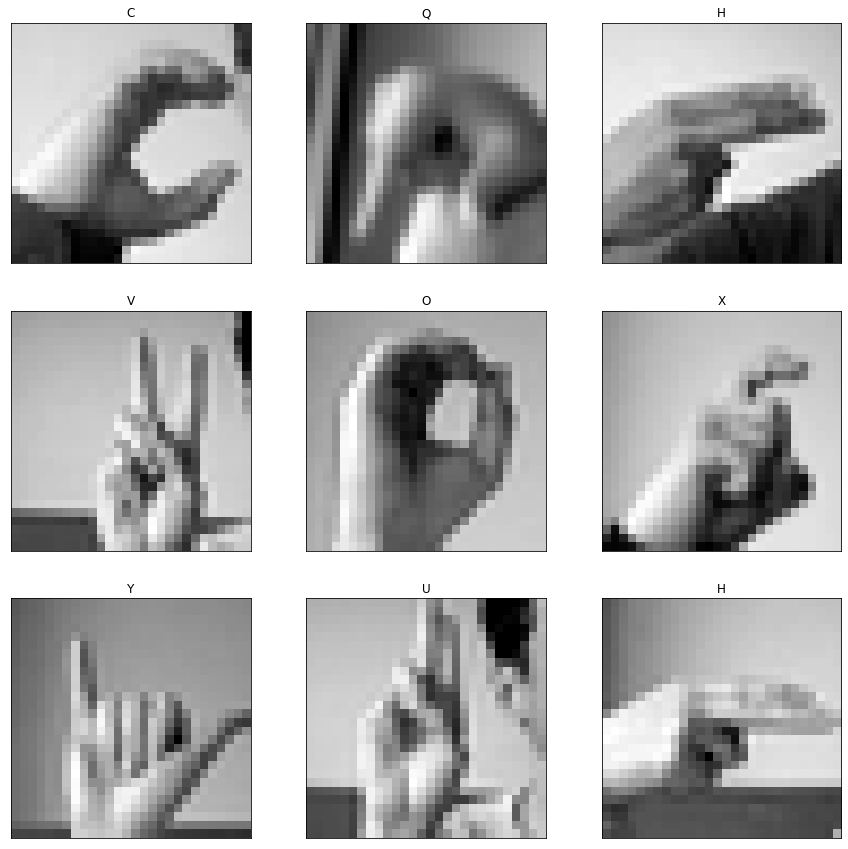

In [ ]:
X_train = train_df.copy()
X_train = X_train.drop(columns = ['label'])
X_train = X_train.to_numpy()
X_train = X_train/255
y_train = train_df['label'].to_numpy().squeeze()
labels_selected = []
fig = plt.figure(figsize = (15,15))
for idx in range(9):
  random_number = np.random.randint(0,len(y_train))
  X_temp = np.reshape(X_train[random_number,:],(28,28))
  y_temp = y_train[random_number]
  ax = fig.add_subplot(3,3,idx + 1,xticks = [],yticks = [])
  ax.imshow(np.squeeze(X_temp),cmap = 'gray')
  ax.set_title(output_mapping[int(y_temp)])


Part B) training model

In [ ]:
# first creating dataset

X_test = test_df.copy()
X_test = X_test.drop(columns = ['label'])
X_test = X_test.to_numpy()
X_test = X_test/255
X_test = torch.tensor(X_test,dtype = torch.float32,device = device)
y_test = test_df['label'].to_numpy().squeeze()
y_test = torch.tensor(y_test,dtype = int,device = device).long()

In [ ]:
class image_loader(Dataset):
    # This loads the data and converts it, make data rdy
    def __init__(self):
       
        
        self.dataset=torch.tensor(X_train,dtype = torch.float32,device = device)

        self.labels=torch.tensor(y_train,dtype = torch.int,device = device).long()
    
    # This returns the total amount of samples in your Dataset
    def __len__(self):
        return len(self.dataset)
    
    # This returns given an index the i-th sample and label
    def __getitem__(self, idx):
        return self.dataset[idx],self.labels[idx]

In [ ]:
ds = image_loader()
dl=DataLoader(ds,batch_size=64, shuffle=True,drop_last=False)

In [ ]:
# defining accuracy function
def accuracy_manual(y, yp):
  """
  function for calculating accuracy
  input: 
    y: ground truth label
    yp: predicted label(one hot coded)
  output:
    acc: accuracy
  """
  yyp =  torch.max(yp,axis = 1).indices
  correct = torch.eq(y, yyp).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(yp)) * 100 
  return acc

In [ ]:
class MLPnet1(nn.Module):
    def __init__(self, input_features, output_features,number_neuron,n_out):
        """
        model for classification of world cup results
        input:
            input_features: Number of input features to the model.
            out_features: Number of output features of the model
              
          
        """
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=number_neuron),
            nn.ReLU(),
         #   nn.Linear(in_features=number_neuron, out_features=number_neuron),
          #  nn.ReLU(),
            nn.Linear(in_features=number_neuron, out_features=number_neuron),
            nn.ReLU(),
            nn.Linear(in_features=number_neuron, out_features=n_out),
            nn.ReLU() ,
            nn.Linear(in_features=n_out, out_features=output_features),
        )
        
    
    def forward(self, x):
        return F.log_softmax(self.layerstack(x),dim = 1)

# Create an instance of BlobModel and send it to the target device
model_simple = MLPnet1(784,25,2048*2,1024*4)
model_simple = model_simple.to(device)

In [ ]:
# optimizer
learning_rate = 0.1
# first we test with Stochastic gradient decent
optimizer = torch.optim.SGD(model_simple.parameters(), lr=learning_rate)
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [ ]:
epochs = 50
for epoch in range(epochs):
  ### Training
  model_simple.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model_simple(batch) # model outputs raw logits 
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc.append(acc_train)
  train_loss.append(loss_train)
  ### Testing
  model_simple.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_simple(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss.append(loss_test)
  test_acc.append(acc_test)
  # Print out what's happening
  
  print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 


Epoch: 0 | Loss: 2.63097, Acc: 20.75% | Test Loss: 2.05336, Test Acc: 31.40%
Epoch: 1 | Loss: 1.80496, Acc: 42.66% | Test Loss: 1.49165, Test Acc: 49.80%
Epoch: 2 | Loss: 1.22397, Acc: 59.45% | Test Loss: 1.26564, Test Acc: 58.81%
Epoch: 3 | Loss: 1.19551, Acc: 63.54% | Test Loss: 1.16146, Test Acc: 59.93%
Epoch: 4 | Loss: 0.81189, Acc: 73.20% | Test Loss: 0.72966, Test Acc: 76.74%
Epoch: 5 | Loss: 0.50960, Acc: 83.55% | Test Loss: 0.62161, Test Acc: 80.84%
Epoch: 6 | Loss: 0.38302, Acc: 88.61% | Test Loss: 1.21498, Test Acc: 67.60%
Epoch: 7 | Loss: 0.54289, Acc: 84.46% | Test Loss: 0.59733, Test Acc: 82.77%
Epoch: 8 | Loss: 0.14119, Acc: 96.10% | Test Loss: 0.55763, Test Acc: 83.58%
Epoch: 9 | Loss: 0.39053, Acc: 89.35% | Test Loss: 0.57472, Test Acc: 84.04%
Epoch: 10 | Loss: 0.11534, Acc: 96.96% | Test Loss: 0.62012, Test Acc: 85.32%
Epoch: 11 | Loss: 0.00612, Acc: 99.76% | Test Loss: 0.64622, Test Acc: 84.86%
Epoch: 12 | Loss: 0.00335, Acc: 99.77% | Test Loss: 0.65708, Test Acc: 85.

now for adam aptimizer

In [ ]:
# testing with adam optimizer
model_simple2 = MLPnet1(784,25,2048*2,2048*2)
model_simple2 = model_simple2.to(device)
learning_rate = 1
optimizer = torch.optim.Adam(model_simple2.parameters(),lr=0.001, betas=(0.8, 0.8), eps=1e-08)
train_loss_adam = []
train_acc_adam = []
test_loss_adam = []
test_acc_adam = []
epochs = 30
for epoch in range(epochs):
  ### Training
  model_simple2.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model_simple2(batch) # model outputs raw logits 
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc_adam.append(acc_train)
  train_loss_adam.append(loss_train)
  ### Testing
  model_simple2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_simple2(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss_adam.append(loss_test)
  test_acc_adam.append(acc_test)
  # Print out what's happening
  
  print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 


Epoch: 0 | Loss: 2.03272, Acc: 31.92% | Test Loss: 1.46697, Test Acc: 48.17%
Epoch: 1 | Loss: 0.97139, Acc: 65.04% | Test Loss: 1.02857, Test Acc: 65.03%
Epoch: 2 | Loss: 0.52885, Acc: 80.30% | Test Loss: 1.41170, Test Acc: 67.28%
Epoch: 3 | Loss: 0.36045, Acc: 87.22% | Test Loss: 1.38901, Test Acc: 72.77%
Epoch: 4 | Loss: 0.25929, Acc: 90.78% | Test Loss: 1.33193, Test Acc: 75.54%
Epoch: 5 | Loss: 0.23518, Acc: 91.98% | Test Loss: 1.32854, Test Acc: 77.62%
Epoch: 6 | Loss: 0.19316, Acc: 93.58% | Test Loss: 2.05417, Test Acc: 70.40%
Epoch: 7 | Loss: 0.18685, Acc: 93.92% | Test Loss: 2.07252, Test Acc: 70.12%
Epoch: 8 | Loss: 0.15572, Acc: 94.91% | Test Loss: 2.62548, Test Acc: 66.95%
Epoch: 9 | Loss: 0.14902, Acc: 95.25% | Test Loss: 2.28711, Test Acc: 74.08%
Epoch: 10 | Loss: 0.13630, Acc: 95.81% | Test Loss: 1.89189, Test Acc: 80.52%
Epoch: 11 | Loss: 0.15035, Acc: 95.71% | Test Loss: 1.87069, Test Acc: 77.31%
Epoch: 12 | Loss: 0.12510, Acc: 96.44% | Test Loss: 1.66634, Test Acc: 79.

for comparing these two methods, first let us look at ADAM optimization steps

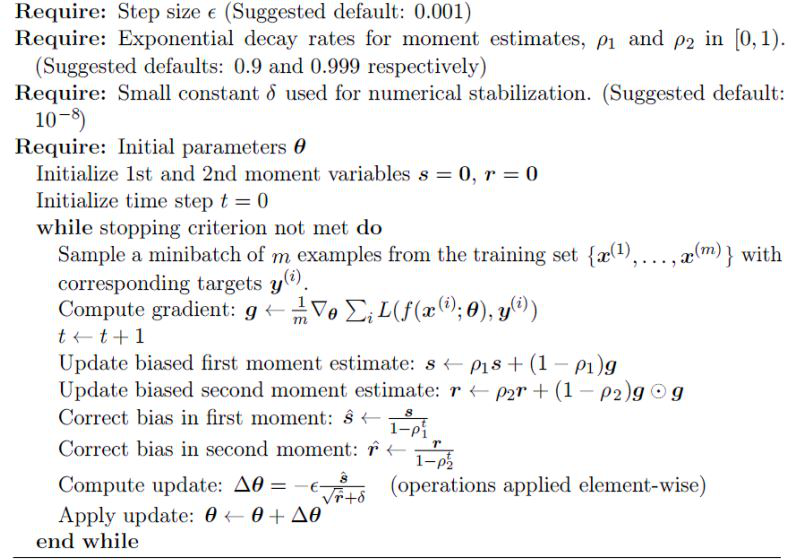

as we can see, in ADAM we also estimate inverse of hermitian matrix and use momentom encoder for updating our parameters, so as we can see in result, because of hermitian term, ADAM mathod converge to a good result so much faster(it only takes 4 epochs to reach %90 accuracy in train compared to 10 epochs for SGD) but also because its format, it damps learning rate faster than normal SGD so when it counter a local minimum in this case, it can't get out of it(SGD counter same issue in epoch 8 , after that result become very bad but then it seems it converge to global minimun which is well generalized as we can see improved result in test accuracy) so in this case, we achive better result with SGD algorithm but ADAM accuracy is also very good(81 against 85 of SGD) but also it has advantage of faster convergence to a good minimum. if we want to speak generally, if model was much deeper, ADAM would be better option overall because it is faster, and generally more stable because of using momentom encoder, but in SGD not only it converge slower, there is also less stability.

part C) now adding drop out

In [ ]:
class MLPnet_drop(nn.Module):
    def __init__(self, input_features, output_features,number_neuron,n_out,rate_drop):
        """
        model for classification of world cup results
        input:
            input_features: Number of input features to the model.
            out_features: Number of output features of the model
              
          
        """
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=number_neuron),
            nn.ReLU(),
            nn.Dropout(rate_drop),
            nn.Linear(in_features=number_neuron, out_features=number_neuron),
            nn.ReLU(),
            nn.Dropout(rate_drop),
            nn.Linear(in_features=number_neuron, out_features=n_out),
            nn.ReLU() ,
            nn.Linear(in_features=n_out, out_features=output_features),
        )
        
    
    def forward(self, x):
        return F.log_softmax(self.layerstack(x),dim = 1)



In [ ]:
# testing with adam optimizer
model_simple3 = MLPnet_drop(784,25,2048*2,2048*2,0.2)
model_simple3.to(device)
learning_rate = 0.1
optimizer = torch.optim.SGD(model_simple3.parameters(), lr=learning_rate)
train_loss = []
train_acc = []
test_loss = []
test_acc = []
epochs = 101
for epoch in range(epochs):
  ### Training
  model_simple3.train()
  loss_train = 0
  acc_train = 0
  counter = 1
  for batch,label in dl:
    # 1. Forward pass
    y_pred = model_simple3(batch) # model outputs raw logits 
    
    
    # 2. Calculate loss and accuracy
    counter = counter + 1
    loss = F.nll_loss(y_pred, label)
    acc_train = acc_train + accuracy_manual(label,y_pred)
    loss_train = loss_train + loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  loss_train = loss_train/counter
  acc_train = acc_train/counter
  train_acc.append(acc_train)
  train_loss.append(loss_train)
  ### Testing
  model_simple3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_simple3(X_test)
    # 2. Calculate test loss and accuracy
    loss_test= F.nll_loss(test_pred, y_test)
    acc_test = accuracy_manual(y_test,test_pred)
  test_loss.append(loss_test)
  test_acc.append(acc_test)
  # Print out what's happening
  
  print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 


Epoch: 0 | Loss: 2.64403, Acc: 20.28% | Test Loss: 2.16006, Test Acc: 33.78%
Epoch: 1 | Loss: 1.82769, Acc: 41.58% | Test Loss: 1.44143, Test Acc: 49.90%
Epoch: 2 | Loss: 1.37596, Acc: 55.41% | Test Loss: 1.46468, Test Acc: 52.51%
Epoch: 3 | Loss: 1.22854, Acc: 61.63% | Test Loss: 1.60307, Test Acc: 44.59%
Epoch: 4 | Loss: 0.94868, Acc: 69.25% | Test Loss: 0.80694, Test Acc: 71.00%
Epoch: 5 | Loss: 0.53821, Acc: 82.05% | Test Loss: 0.88487, Test Acc: 69.52%
Epoch: 6 | Loss: 0.58307, Acc: 82.38% | Test Loss: 0.71468, Test Acc: 78.51%
Epoch: 7 | Loss: 0.41788, Acc: 87.21% | Test Loss: 0.81469, Test Acc: 76.37%
Epoch: 8 | Loss: 0.22121, Acc: 93.47% | Test Loss: 0.53317, Test Acc: 83.32%
Epoch: 9 | Loss: 0.11788, Acc: 96.71% | Test Loss: 0.62661, Test Acc: 81.40%
Epoch: 10 | Loss: 0.20211, Acc: 94.76% | Test Loss: 0.55781, Test Acc: 84.24%
Epoch: 11 | Loss: 0.31342, Acc: 92.03% | Test Loss: 0.52343, Test Acc: 85.19%
Epoch: 12 | Loss: 0.19905, Acc: 94.55% | Test Loss: 0.65676, Test Acc: 81.

when we add dropout, we see that our training data accuracy converge slower but our test accuracy can achive better results, it's because dropout add regularization to model so it can be more generalized and work better for test data.

Part D)
we achive our best result using dropout and SGD optimizer(model_simple3)
model have 3 hidden layer and output layer, between first two hidden layer we use dropout(p = 0.2) and all activation functions are relu (expect output layer where we use softmax) 
all hidden layers have 4096 parameters and we achive %99.7 accuracy in train data and %87.37 on test data, if we print trainable parameters:

In [ ]:
for name, param in model_simple3.named_parameters():
    if param.requires_grad:
        print(name, param.data)

layerstack.0.weight tensor([[ 0.0190,  0.0204, -0.0121,  ..., -0.0586, -0.0358, -0.0617],
        [ 0.0121,  0.0222,  0.0216,  ...,  0.0304,  0.0223,  0.0066],
        [ 0.0148, -0.0126,  0.0166,  ...,  0.0101,  0.0323, -0.0229],
        ...,
        [-0.0304,  0.0044, -0.0065,  ...,  0.0063,  0.0177,  0.0213],
        [-0.0187,  0.0326, -0.0086,  ..., -0.0351, -0.0024, -0.0147],
        [-0.0179,  0.0321,  0.0131,  ...,  0.0137,  0.0218, -0.0029]],
       device='cuda:0')
layerstack.0.bias tensor([ 0.0138, -0.0294,  0.0741,  ...,  0.0028, -0.0275,  0.0028],
       device='cuda:0')
layerstack.3.weight tensor([[-0.0024, -0.0114,  0.0016,  ..., -0.0061, -0.0122,  0.0167],
        [-0.0146,  0.0053,  0.0002,  ..., -0.0010,  0.0099,  0.0047],
        [-0.0214, -0.0048, -0.0042,  ...,  0.0088, -0.0128, -0.0029],
        ...,
        [ 0.0157,  0.0098, -0.0093,  ...,  0.0101, -0.0014, -0.0013],
        [-0.0064, -0.0077, -0.0138,  ..., -0.0131, -0.0032,  0.0036],
        [ 0.0084,  0.0054, -

Now using webcam!

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def take_photo(filename='photo.jpg', quality=1080):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  img = cv2.resize(img, (28,28), interpolation=cv2.INTER_CUBIC)

  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  cv2.imwrite(filename, gray)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  a = (Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(28, 28)
Saved to photo.jpg


Text(0.5, 1.0, 'predicted = F')

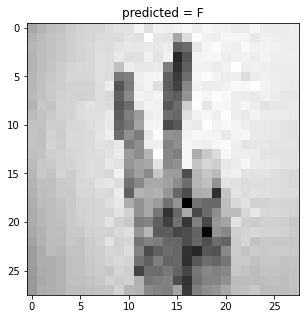

In [ ]:
image = PIL.Image.open('photo.jpg')
# convert image to numpy array
data = np.asarray(image)
data = data/255
data_opened=torch.tensor(np.reshape(data,(1,784)) ,dtype= torch.float32,device = device)
predicted = model_simple3(data_opened)
label = torch.max(predicted,axis = 1).indices
fig = plt.figure(figsize = (5,5))
plt.imshow(np.squeeze(data),cmap = 'gray')
title_image = 'predicted = ' + output_mapping[int(label)]
plt.title(title_image)


In [ ]:
try:
  filename = take_photo('photo2.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  a = (Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(28, 28)
Saved to photo2.jpg


Text(0.5, 1.0, 'predicted = G')

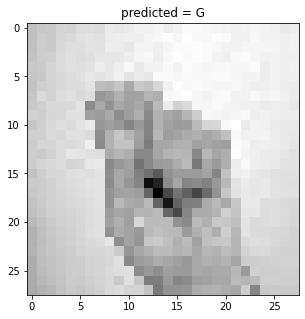

In [ ]:
image = PIL.Image.open('photo2.jpg')
# convert image to numpy array
data = np.asarray(image)
data = data/255
data_opened=torch.tensor(np.reshape(data,(1,784)) ,dtype= torch.float32,device = device)
predicted = model_simple3(data_opened)
label = torch.max(predicted,axis = 1).indices
fig = plt.figure(figsize = (5,5))
plt.imshow(np.squeeze(data),cmap = 'gray')
title_image = 'predicted = ' + output_mapping[int(label)]
plt.title(title_image)


In [ ]:
try:
  filename = take_photo('photo3.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  a = (Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(28, 28)
Saved to photo3.jpg


Text(0.5, 1.0, 'predicted = T')

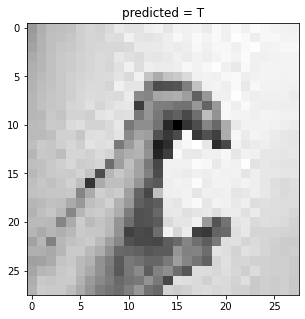

In [ ]:
image = PIL.Image.open('photo3.jpg')
# convert image to numpy array
data = np.asarray(image)
data = data/255
data_opened=torch.tensor(np.reshape(data,(1,784)) ,dtype= torch.float32,device = device)
predicted = model_simple3(data_opened)
label = torch.max(predicted,axis = 1).indices
fig = plt.figure(figsize = (5,5))
plt.imshow(np.squeeze(data),cmap = 'gray')
title_image = 'predicted = ' + output_mapping[int(label)]
plt.title(title_image)


because of our low quality webcam, and problem of downsampling, results aren't perfect but predicted result are close to real values